# Espaços de Sequências
Genomas são sequèncias de 4 nucleotídeos, denotados pelas letras A (adenina), C (citosina), T (timina) e G (guanina). Toda a informação codificada nesta sequência (genótipo) é transmitida de geração para geração, quase que perfeitamente. Durante a reprodução, dos organismos, processos geradores de variabilidade tais como mutação e recombinação podem introduzir "erros" no processo de cópia do genoma. Genomas de Comprimento L permitem $4^L$ sequencias diferentes. Modelos computacionais  de evolução de sequências frequentemente simplificam esta representação para sequências binárias cuja manipulação é mais natural em computadores.

A figura abaixo mostra um exemplo de um espaço de sequências binárias, particularmente para uma sequencia de comprimento 3, $L=3$. Para sequências deste tamanho, o espaço consiste em reticulado dem 3 dimensões no qual cada vértice representa uma sequência possível. Cada dimensão no espaço de sequências assim definido, contém tantos pontos quantos valores possíveis para cada locus da sequencia. Logo, para sequências de DNA, são 4 pontos e para sequências binárias, 2. Para representar o genoma humano precisaríamos de cerca de 3 bilhões de dimensões.

![sequence space](sequence-space.png)

A distância entre duas sequências no espaço de sequências como o ilustrado acima é o caminho mais curto, passando pelas arestas do reticulado (e não pelas diagonais). Assim, temos que a distância entre $000$ e $110$  é $2$ e não $\sqrt{2}$ (pela distância Euclidiana) . Esta distância é chamada de distância de Hamming, ou distância de Manhattan.

## A Equação da Quasi-Espécie
Com o conceito de sequência como uma série de elementos que podem sofrer mutação ou outros tipos de error de replicação durante a reprodução, Podemos introduzir o conceito de quasi-espécie que é o conjunto de variantes de sequências em uma população que podem pretencer a uma mesma espécie biológica. Se atribuirmos um fitness  fi ao genoma i de uma população infinita de de indivíduos de genoma com comprimento L, podemos escrever a equação da quasi-espécie:

$$\dot{x}_i=\sum_{j=0}^n x_j f_j q_{ji}−\phi x_i$$
 

Onde $Q$ é a matrix de mutação, como vimos anteriormente. Caso não haja erros na reprodução, a matriz de mutação é a matriz identidade e a equação da Quasi-espécie se reduz à equação da seleção, vista anteriormente. Caso existam erros, e algum $f_i$ seja maior do que os demais, o equilíbrio não maximiza o fitness médio da população. 

Na equação acima, é comum combinar o vetor $\overrightarrow{f}$  com a matrix $Q$, para obter a matrix de mutação-seleção, $W$:

$$W=[wij]=\left[f_j q_{ji}\right].$$
Assim em notação vetorial, 

$$\dot{\overrightarrow{x}}=\overrightarrow{x} W−\phi \overrightarrow{x}$$ 
cujo equilíbrio é dado por:

$$\overrightarrow{x} W=\phi \overrightarrow{x}$$ 

#### Exercício 1:
Mostre por meio de simulação que o fitness médio da população é menor que o fitness da sequência com maior $f$, quando a matrix $Q$ é diferente da identidade.

In [2]:
%display typeset

In [3]:
# Criando uma matriz de mutação
import numpy as np
from itertools import cycle
from scipy import stats as st
n = 6
Q = np.eye(n) + st.uniform(0,1).rvs((n,n))
s = Q.sum(axis=1)
s.shape = n,1
Q /= np.ones((n,n)) * s
show(matrix(Q))
pretty_print(html("Como $Q$ é uma matriz estocástica, todas as linhas devem somar 1. Então se somarmos as colunas de Q obtemos um vetor de uns:"))
Q.sum(axis=1)

[  0.5474417979076106  0.04209233687525005  0.23914506889203255 0.038632027416116904  0.12651243864105766 0.006176330267932431]
[  0.2699227835179943  0.31688529610127114  0.09641041434327602  0.08815679936784745  0.09539872045070949  0.13322598621890155]
[ 0.08728612185583437  0.02146812390490674   0.4063227591265866  0.18658904615302438  0.06841249228851282  0.22992145667113503]
[ 0.07834454657155658  0.09672008021177272  0.11437964209181707   0.4981114882387042  0.13080786669624017   0.0816363761899092]
[0.030932582393444215   0.0861125963352768  0.10883245993630562  0.26091291017976614  0.40593842007339986  0.10727103108180733]
[  0.3045256552652197  0.04543860081754389 0.020859999443489985   0.1797243312805852  0.07877123594025816   0.3706801772529031]

Como <script type="math/tex">Q</script> é uma matriz estocástica, todas as linhas devem somar 1. Então se somarmos as colunas de Q obtemos um vetor de uns:

array([1., 1., 1., 1., 1., 1.])

In [4]:
a = np.array([[.1,.3,.5]])
a.shape = 3,1
a*np.ones((3,3))

array([[0.1, 0.1, 0.1],
       [0.3, 0.3, 0.3],
       [0.5, 0.5, 0.5]])

In [5]:
f = st.uniform(0,1).rvs((n,1))
show("f=", matrix(f))
show("Q=",matrix(Q))
W = f * Q 
show("=")
show("W=f*Q=",matrix(W))
pretty_print(html("Conferindo, a soma das colunas deve nos retornar o vetor $f$:"))
W.sum(axis=1)

'f=' [  0.5575656113533738]
[   0.956228612891673]
[ 0.11935175788516761]
[0.013145654650487892]
[  0.8887431166653782]
[  0.3220765047303288]

'Q=' [  0.5474417979076106  0.04209233687525005  0.23914506889203255 0.038632027416116904  0.12651243864105766 0.006176330267932431]
[  0.2699227835179943  0.31688529610127114  0.09641041434327602  0.08815679936784745  0.09539872045070949  0.13322598621890155]
[ 0.08728612185583437  0.02146812390490674   0.4063227591265866  0.18658904615302438  0.06841249228851282  0.22992145667113503]
[ 0.07834454657155658  0.09672008021177272  0.11437964209181707   0.4981114882387042  0.13080786669624017   0.0816363761899092]
[0.030932582393444215   0.0861125963352768  0.10883245993630562  0.26091291017976614  0.40593842007339986  0.10727103108180733]
[  0.3045256552652197  0.04543860081754389 0.020859999443489985   0.1797243312805852  0.07877123594025816   0.3706801772529031]

'='

'W=f*Q=' [  0.30523472073074703   0.02346923954314095   0.13333906653893082   0.02153988998408752    0.0705389851947075  0.003443709361760093]
[  0.25810788887127106    0.3030147871366856    0.0921903967757823   0.08429805397648629   0.09122298612822241   0.12739450000322539]
[ 0.010417752082472781  0.002562258326547208   0.04849533557050964   0.02226973066048013  0.008165151215939477  0.027441530029218363]
[0.0010298903529787481  0.001271448772231452 0.0015035952739854358  0.006548001601826567 0.0017195550411558298 0.0010731636083098589]
[ 0.027491119682858216   0.07653197725116154   0.09672409963815216   0.23188455297139923   0.36077497663025293    0.0953363904915541]
[    0.098080558648535  0.014634705731151196  0.006718515709435858   0.05788498443384658  0.025370364344926403   0.11938737586243375]

Conferindo, a soma das colunas deve nos retornar o vetor <script type="math/tex">f</script>:

array([0.55756561, 0.95622861, 0.11935176, 0.01314565, 0.88874312,
       0.3220765 ])

In [6]:
def quasispecies(t, y):
    """quasispecies model"""
    y = np.array(y)
    y.shape = 1,n
    d = np.dot(y,W) - sum(f*y)*y
    return d[0]

In [8]:
c = cycle(['red','blue','green', 'black', 'yellow', 'orange', 'magenta', 'gray', 'pink', 'brown'])
def plot_sol(sol):
    #fitness medio
    plots = list_plot([(j[0],sum(f*np.array(j[1]))) for j in sol], plotjoined=True, linestyle='-.', legend_label=r"$\phi$")
    for i in range(len(sol[0][1])):
        co = c.__next__()
        plots += list_plot([(j[0],j[1][i]) for j in sol],color=co, plotjoined=True, legend_label='$x_{%s}$'%i, alpha=.8, gridlines=true)
    show(plots)

T = ode_solver()
T.algorithm = "rk8pd"
T.function = quasispecies
T.ode_solve(y_0=[1./n]*n,t_span=[0,50], num_points=500)

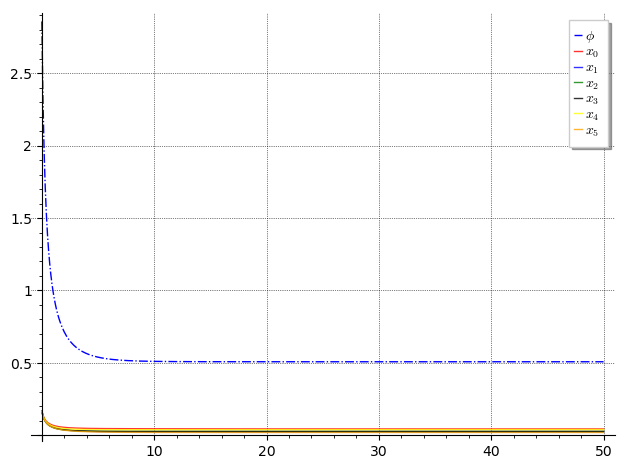

In [9]:
plot_sol(T.solution)

## Calculando a matriz de mutação para mutações pontuais
Considere o conjunto de todas as sequências de tamanho L. A distância de Hamming $h_{ij}$ conta o número de posições diferentes entre duas sequências $i$ e $j$. Por exemplo, a distância de Hamming entre a sequência 1010 e a sequência 1100 é 2. seja $u$ a probabilidade de que uma mutação ocorra em uma posição da sequência. Logo, $(1-u)$ é a probabilidade da sequência ser copiada corretamente. Nós podemos escrever a probabilidade da replicação da sequência $i$ gerar a sequência $j$ como

$$q_{ij}=u^{h_{ij}} (1-u)^{L-h_{ij}}$$

ou seja, uma mutação precisa ocorrer em tantas posições quantos sejam as posições diferentes entre $i$ e $j$, que é precisamente o que nos dá a distância de Hamming. E nenhuma mutação deve ocorrer nas posições remanescentes. Este cálculo assume independencia entre as mutações nas várias posições e não considera outros tipos de mutações como inserções e deleções.

 
## Teoria de Jogos Evolutivos
A teoria dos jogos,  inventada por John von Neumann, versa estratégias racionais para maximizar os retornos em um jogo cujas regras são conhecidas. Jonh Maynard Smith e George Price em um artigo publicado na revista Nature em 1973, combinaram a teoria dos jogos com conceitos de evolução gerando o conceito de jogos evolutivos.

Na teoria dos jogos evolutivos uma população infinitamente grande de jogadores,  com estratégias fixas competem em rodadas do jogo. Neste contexto, o retorno esperado do cada encontro conforme explicitado na matrix de retornos (Payoff Matrix) é interpretada como o fitness da estratégia. Estratégia com maior retorno vêem sua frequência crescer, enquanto que as demais podem ser excluídas competitivamente.

### A Equação do Replicador
A equação do Replicador é uma extensão da equação da Quasi-espécie, pois ela permite que  o fitness de cada tipo seja definida em função da estrutura da população ao invés de ser constante para cada tipo. Na sua forma mais simples, sem mutação, pode escrita da seguinte forma:

 

$$\dot{x_i} = x_i [ f_i(\overrightarrow{x}) - \phi(x)], \quad \phi(\overrightarrow{x}) = \sum_{j=1}^{n}{x_j f_j(\overrightarrow{x})}$$

A função de fitness $f_i(x)$ é definida, matricialmente, como $(Ax)_i$ que é o payoff esperado de $x_i$, se assumirmos que o fitness depende linearmente da  distribuição de frequências dos tipos. $A$ é a chamada matriz de payoff e contém toda a informação do fitness dos tipos. **O Fitness médio da população pode ser escrito como $x^T Ax$.**

#### Duas estratégias $A$ e $B$
seja $X_A$ a frequência de $A$ e $x_B$ a frequência de $B$. O vetor $\overrightarrow{x} = (x_A, x_B)$ define a composição da população. Seja $f_A(\overrightarrow{x})$ o fitness de $A$ e $f_B(\overrightarrow{x})$ o fitness de $B$. Então a dinâmica de seleção pode ser escrita como

$$\dot{x}_A = x_A [f_A(\overrightarrow{x}) - \phi]$$

$$\dot{x}_B = x_B [f_B(\overrightarrow{x}) - \phi]$$

O fitness médio fica sendo $\phi=x_A f_A(\overrightarrow{x}) + x_B f_B(\overrightarrow{x})$.

como $x_A +x_B = 1$ sempre, podemos introduzir a variável $x$, tal que $x_A=x$ e $x_B=1-x$. As funções de fitness passam a ser apenas $f_A(x)$ e $f_B(x)$. e o fitness médio fica sendo

$$\phi=x f_A(x) (1-x) f_B(x)$$

$$=x f_A(x) + f_B - x f_B(x)$$

então podemos escrever o modelo de seleção como

$$\dot{x}= x [f_A(x) - x f_A(x)+f_B(x) -x f_B(x)]$$

$$\dot{x}=x[(1-x)f_A(x) + (1-x)f_B(x)]$$

$$\dot{x}=x (1-x)[f_A(x)+f_B(x)]$$

Payoff matrix:

| - | A	| B |
|---|---|---|
|A	|$a$|$b$|
|B	|$c$|$d$|


Agora, como o fitness de cada tipo depende da estrutura da população, definimos o fitness de cada tipo em função das interações possíveis. Logo a matriz de payoff acima pode ser interpretada como:

se $A$ encontra com $A$, ambos tem payoff $a$, 
se $B$ se encontra com $B$ ambos tem payoff $d$, 
se $A$ se encontra com $B$, $A$ tem payoff $b$ e $B$ tem payoff $c$.
A Matriz de Payoff tem sua origem na teoria de jogos, na qual seus valores correspondem aos ganhos de dois jogadores. Na teoria dos jogos evolutivos, os ganhos são interpretados como fitness. Neste caso

$$f_A = a x_A +b x_B$$

$$f_B = c x_A + d x_B$$

se nós plugarmos estas funções lineares de fitness no modelo de seleção, temos

$$\dot{x} =x(1-x)[(a-b-c+d)x +b -d]$$

In [10]:
var('x a b c d')
pretty_print(html("Estrutura da população:"))
X = matrix([[x],[(1-x)]])
show(X)
pretty_print(html("Matriz de payoff:"))
A = matrix([[a,b],[c,d]])
show(A)

Estrutura da população:

[     x]
[-x + 1]

Matriz de payoff:

[a b]
[c d]

Calculando o fitness médio de ambas as estratégias:

In [13]:
(A*X)

[-b*(x - 1) + a*x]
[-d*(x - 1) + c*x]

In [18]:
var('a b c d')
A = matrix([[a,b],[c,d]])
f = X[0]*((A*X)[0] - (X.transpose()*(A*X))[0])
pretty_print(html("A e B são bi-estáveis se $a>c$ e $b<d$"))
show(f.expand())
pretty_print(html("Fazendo $a=3,b=1,c=2,d=2$"))
show(f(a=3,b=1,c=2,d=2).expand())
pf = plot(f(a=3,b=1,c=2,d=2),(x,0,1), legend_label=r"$a>c,\, b<d$: Bi-estável")

A e B são bi-estáveis se <script type="math/tex">a>c</script> e <script type="math/tex">b<d</script>

-a*x^3 + b*x^3 + c*x^3 - d*x^3 + a*x^2 - 2*b*x^2 - c*x^2 + 2*d*x^2 + b*x - d*x

Fazendo <script type="math/tex">a=3,b=1,c=2,d=2</script>

-2*x^3 + 3*x^2 - x

A e B coexistem se <script type="math/tex">a<c</script> e <script type="math/tex">b>d</script>, conforme curva vermelha abaixo.

-a*x^3 + b*x^3 + c*x^3 - d*x^3 + a*x^2 - 2*b*x^2 - c*x^2 + 2*d*x^2 + b*x - d*x

Fazendo <script type="math/tex">a=1,b=2,c=2,d=1</script>

2*x^3 - 3*x^2 + x

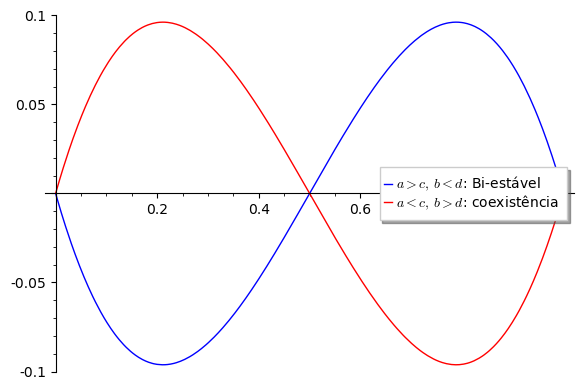

In [19]:
var('a b c d')
A = matrix([[a,b],[c,d]])
g = X[0]*((A*X)[0] - (X.transpose()*(A*X))[0])
pretty_print(html("A e B coexistem se $a<c$ e $b>d$, conforme curva vermelha abaixo."))
show(g.expand())
pretty_print(html("Fazendo $a=1,b=2,c=2,d=1$"))
show(g(a=1,b=2,c=2,d=1).expand())
pg = plot(g(a=1,b=2,c=2,d=1),(x,0,1),color="red", legend_label=r"$a<c,\, b>d$: coexistência")
show(pf+pg)

-x^2 + x

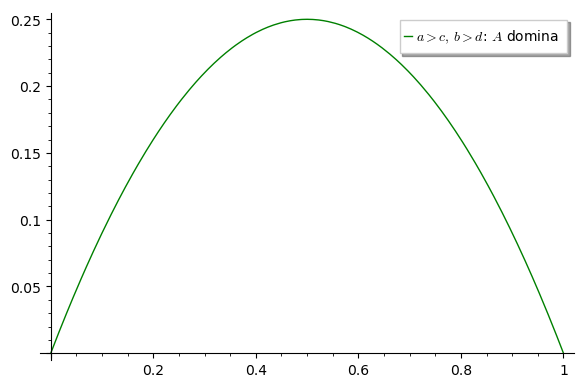

In [21]:
h = x*(1-x)*((a-b-c+d)*x +b-d)
show(h(a=3,b=3,c=2,d=2).expand())
plot(h(a=3,b=3,c=2,d=2),(x,0,1),color="green",legend_label=r"$a>c,\, b>d$: $A$ domina")

Há cinco possibilidades para a dinâmica da seleção entre dois tipos: A domina B, B domina A,  A e B são Bi-estáveis, A e B coexistem em um equilíbrio estável, e A e B são variantes Neutras um do outro. Esta dinâmica é denominada seleção dependente da frequência.

#### Exercício 2:
Construa o Gráfico das outras 3 situações.

### O Equilíbrio de Nash
Nó já vimos que os tipos dos modelos de seleção podem ser interpretados como as estratégias de um jogo. O equilíbrio de Nash, é um equilíbrio no qual nenhum dos jogadores pode desviar de sua estratégia e obter um melhor payoff.

no caso da matriz de payoff para duas estratégias, A e B, as seguintes condições levam  a um equilíbrio de Nash:

1. A é um equilíbrio e Nash estrito se $a>c$
1. A é um equilíbrio de Nash se $a\geq c$
1. B é um equilíbrio de Nash estrito, se $d>b$
1. B é um equilíbrio de Nash se $d\geq b$
Consideremos o seguinte exemplo de jogo:

In [22]:
matrix([[3,0],[5,1]])

[3 0]
[5 1]

Se ambos os jogadores escolherem a estratégia A: a1,1, então um dos jogadores pode melhorar o seu retorno trocando para a estratégia B. Se ambos jogarem B nenhum jogador consegue melhores condições mudando de estratégia. Logo a estratégia B é um equilíbrio de Nash. Note que apesar de B dominar A, o Payoff de jogar no equilíbrio de Nash é menor do que jogar a estratégia dominada A. Este é um exemplo do famoso dilema do prisioneiro.

Considere este outro jogo:

In [23]:
matrix([[5,0],[3,1]])

[5 0]
[3 1]

Neste caso ambas estratégias são esquilíbrios de Nash.

### Estratégia Evolutivamente Estável (ESS)
Este conceito foi introduzido pelo biólogo John Maynard Smith sem que ele tivesse conhecimento dos conceito de equilíbrio de Nash na teoria de jogos. 

Imagine  uma grande população de jogadores do tipo A. Uma quantidade infinitesimal $\epsilon$ de um mutante tipo B, é introduzida na população. Se temos a matriz de payoff abaixo, e as frequências de B e A são, respectivamente, $\epsilon$ e $1-\epsilon$, que condições seletivas impedem a invasão de B em A?

In [24]:
var('a b c d')
matrix([[a,b],[c,d]])

[a b]
[c d]

Para que B não invada, o fitness de A tem que ser maior que o fitness de B, logo:

$$a(1-\epsilon) + b\epsilon > c(1-\epsilon) + d \epsilon$$

Cancelando os termos com $\epsilon$, chegamos à seguinte conclusão:

$$a>c$$

Contudo, se $a=c$, então temos que

$$b>d$$

Em suma, A é uma ESS se:

1. $a>c$
1. $a=c$ e $b>d$

Esta conclusão no entanto só vale para populações infinitamente grandes e quantidade infinitesimalmente pequenas da estratégia invasora.

#### Mais de duas estratégias
Seja o payoff da estratégia S_i versus a estratégia S_j denotado por $E(S_i,S_j)$

1. A estratégia $S_k$ é um equilíbrio de Nash estrito se: $$E(S_k,S_k)>E(S_i,S_k)\,\,\,\,\,\ \forall i$$
1. A estratégia $S_k$ é um equilíbrio de Nash se: $$E(S_k,S_k) \geq E(S_i,S_k)\,\,\,\,\,\ \forall i$$
1. A estratégia $S_k$ é ESS se $\forall i \neq k$ temos uma das duas situações abaixo: $$E(S_k,S_k)>E(S_i,S_k)$$ ou $$E(S_k,S_k)=E(S_i,S_k) \,\,\, e \,\,\, E(S_k,S_i)>E(S_i,S_i)$$ Note que a ESS garante que a seleção se oporá a qualquer invasor potencial. O mesmo é verdadeiro para um equilíbrio de Nash estrito, mas não para um esquilíbrio de Nash. Se $E(S_k,S_k)=E(S_j,S_k)$ e E(S_k,S_j)<E(S_j,S_j) então $S_k$ é um equilíbrio de Nash mas a seleção favorecerá a invasão de $S_k$ por $S_j$. Portanto, faz sentido adicionar uma quarta definição:
1. A estratégia $S_k$ é ESS contra invasões por meio de seleção (ESS fraco) se $\forall i \neq k$ temos uma das duas situações $$E(S_k,S_k)>E(S_i,S_k)$$ ou $$E(S_k,S_k)=E(S_i,S_k)\,\,\, e \,\,\, E(S_k,S_i)\geq E(S_i,S_i)$$
Logo,

Nash estrito $\Rightarrow$ ESS $\Rightarrow$ ESS fraco $\Rightarrow$ Nash.

#### Três estratégias: Pedra Papel e Tesoura
Este é um jogo interessante no simplex $S_3$ no qual temos três estratégias $Pe$ (pedra), $Pa$ (papel)  e $T$ (tesoura). A pedra domina a tesoura que domina o papel, que por sua vez domina a pedra. Este jogo apresenta uma estratégia cíclica de dominação, que pode ser descrita por uma matriz $3x3$ como a apresentada abaixo (ordem das linhas: $Pe$, $T$ e $Pa$).

In [25]:
matrix([[4,2,1],[3,1,3],[5,0,2]])

[4 2 1]
[3 1 3]
[5 0 2]

Na matriz acima a ordem das linhas e colunas é a da dominância: $Pe \rightarrow T \rightarrow Pa$. Antes de analisarmos este modelo convém observar que a dinâmica da equação replicante não se altera se adicionarmos uma constante a cada coluna da matriz. Desta forma, podemos simplificar a nossa matriz de payoff, subtraindo o elemento da diagonal de cada coluna para obter: uma matriz de payoff com a diagonal 0.

In [26]:
matrix([[0,1,-1],[-1,0,1],[1,-1,0]])

[ 0  1 -1]
[-1  0  1]
[ 1 -1  0]

Vamos simular a dinâmica deste jogo:

In [27]:
html("Seja $X$ o nosso vetor de frequências (pedra, tesoura e papel):")
X = matrix([[0.2],[0.5],[0.3]])
show(X)
pretty_print("Seja a matriz de Payoff")
A = matrix([[0,1,-1],[-1,0,1],[1,-1,0]])
show(A)
pretty_print(html("Podemos então definir o nosso sistema de equações diferenciais"))

[0.200000000000000]
[0.500000000000000]
[0.300000000000000]

'Seja a matriz de Payoff'

[ 0  1 -1]
[-1  0  1]
[ 1 -1  0]

Podemos então definir o nosso sistema de equações diferenciais

In [30]:
import numpy as np
A = np.matrix([[0,1,-1],[-1,0,1],[1,-1,0]])
def fun(t,X):
    X = np.matrix(X).T
    return [float(X[0]*((A*X)[0] - (X.T*(A*X))[0])),
            float(X[1]*((A*X)[1] - (X.T*(A*X))[0])),
            float(X[2]*((A*X)[2] - (X.T*(A*X))[0])),
    ]
r = fun(0,[.56,.22,.22])
show(r)

[0.0, -0.07480000000000002, 0.07480000000000002]

In [31]:
T = ode_solver()
T.function = fun
inits = [1/3,1/3,1/3]
inits= [.56,.22,.22]
tspan = [0,100]
T.ode_solve(tspan, inits, num_points=500)

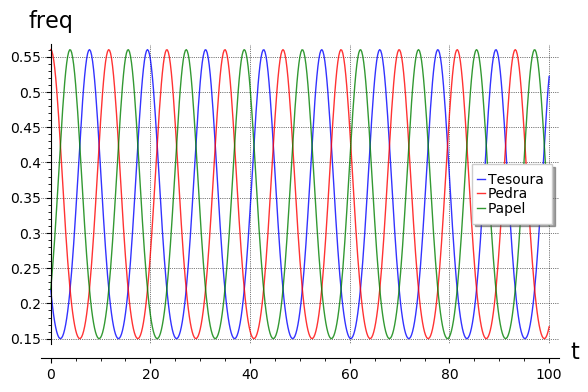

In [32]:
def plot_sol(sol, labels=['Pedra','Tesoura','Papel']):
    a=list_plot([(i[0],i[1][0]) for i in sol],color='red', plotjoined=True, legend_label=labels[0], alpha=.8)
    c=list_plot([(i[0],i[1][1]) for i in sol],color='blue', plotjoined=True, legend_label=labels[1], alpha=.8, axes_labels=["t","freq"], gridlines=True)
    r = list_plot([(i[0],i[1][2]) for i in sol],color='green', plotjoined=True, legend_label=labels[2], alpha=.8, axes_labels=["t","freq"], gridlines=True)
    a.legend()
    c.legend()
    r.legend()
    show(c+a+r)
plot_sol(T.solution)

In [33]:
np.linalg.det(A)

0.0

In [35]:
point3d([(i[1][0],i[1][1],i[1][2]) for i in T.solution], size=5)

Graphics3d Object

[ 0.0  1.0 -1.1]
[-1.1  0.0  1.0]
[ 1.0 -1.1  0.0]

Podemos calcular o determinante da matriz de Payoffs:

-0.33100000000000024

Como o determinante é positivo, temos um único equilíbrio interno, globalmente estável:

'a1a2a3>b1b2b3 ' True

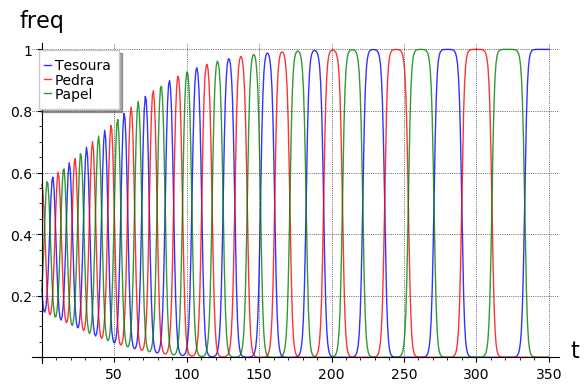

In [37]:
inits = [.56,.22,.22]
A = np.matrix([[0,1,-1.1],[-1.1,0,1],[1,-1.1,0]])
show(matrix(A))
pretty_print(html("Podemos calcular o determinante da matriz de Payoffs:"))
show(np.linalg.det(A))
pretty_print(html("Como o determinante é positivo, temos um único equilíbrio interno, globalmente estável:"))
pa = A[2,0]*A[0,1]*A[1,2]
pb = A[1,0]*A[2,1]*A[0,2]
#print pa, pb
show("a1a2a3>b1b2b3 ",pa > pb)
T.ode_solve([0,350], inits, num_points=500)
plot_sol(T.solution)

In [38]:
point3d(inits, size=30, color="green")
line3d([(i[1][0],i[1][1],i[1][2]) for i in T.solution], size=10)

Graphics3d Object

[ 0.0  1.1 -1.0]
[-1.0  0.0  1.1]
[ 1.1 -1.0  0.0]

Podemos calcular o determinante da matriz de Payoffs:

'pa>pb: ' True

0.33100000000000024

Como o determinante é positivo, temos um único equilíbrio interno, globalmente estável:

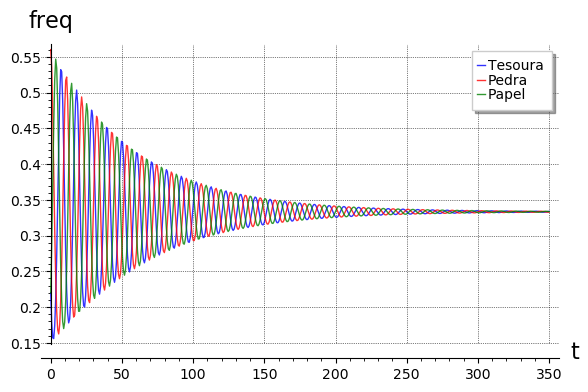

In [41]:
inits = [.56,.22,.22]
del(A)
A = np.matrix([[0,1.1,-1],[-1,0,1.1],[1.1,-1,0]])
show(matrix(A))
pretty_print(html("Podemos calcular o determinante da matriz de Payoffs:"))
pa = A[2,0]*A[0,1]*A[1,2]
pb = A[1,0]*A[2,1]*A[0,2]
#print pa, pb
show("pa>pb: ",pa > pb)
tspan=[0,350]
show(np.linalg.det(A))
pretty_print(html("Como o determinante é positivo, temos um único equilíbrio interno, globalmente estável:"))
#inits = [1/3,1/3,1/3]
T.ode_solve(tspan, inits, num_points=500)
plot_sol(T.solution)

In [44]:
l=line3d([(i[1][0],i[1][1],i[1][2]) for i in T.solution], size=2)
p=point3d([(i[1][0],i[1][1],i[1][2]) for i in T.solution], size=2,color='red')
show(l+p)

Graphics3d Object

### Replicante Mutante
Se adicionarmos mutação à equação do replicante acima temos a equação do replicante mutante:

$$\dot{x_i} = \sum_{j=1}^{n}{x_j f_j(x) Q_{ji}} - \phi(x)x_i,$$

Para uma discussão mais aprofundada sobre este modelo, veja [este artigo](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.95.1016&rep=rep1&type=pdf).